## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
from keras.regularizers import l1, l1_l2#, 12

# l1
# def build_mlp_l1(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
#     input_layer = keras.layers.Input(input_shape)
    
#     for i, n_units in enumerate(num_neurons):
#         if i == 0:
#             x = keras.layers.Dense(units=n_units,
#                                    activation="relu", 
#                                    name="hidden_layer"+str(i+1),
#                                    kernel_regularizer=l1(l1_ratio))(input_layer)
#         else:
#             x = keras.layers.Dense(units=n_units,
#                                    activation="relu",
#                                    name="hidden_layer"+str(i+1),
#                                    kernel_regularizer=l1(l1_ratio))(x)
    
#     out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
#     model = keras.models.Model(inputs=[input_layer], outputs=[out])
#     return model
  
# l2
# def build_mlp_l2(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
#     input_layer = keras.layers.Input(input_shape)
    
#     for i, n_units in enumerate(num_neurons):
#         if i == 0:
#             x = keras.layers.Dense(units=n_units,
#                                    activation="relu", 
#                                    name="hidden_layer"+str(i+1),
#                                    kernel_regularizer=l2(l2_ratio))(input_layer)
#         else:
#             x = keras.layers.Dense(units=n_units,
#                                    activation="relu",
#                                    name="hidden_layer"+str(i+1),
#                                    kernel_regularizer=l2(l2_ratio))(x)
    
#     out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
#     model = keras.models.Model(inputs=[input_layer], outputs=[out])
#     return model
  
# l1_l2
def build_mlp_l1_l2(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [0]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
# L1_EXP = [1e-4, 1e-8]
# L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
L1_L2_EXP = [1e-4, 1e-8, 1e-12]

In [18]:
# L1_results = {}
# L2_results = {}
L1_L2_results = {}

# for exp in L1_EXP:
#     keras.backend.clear_session()
#     print('Experiment with l1 regularizer: %.6f' % (exp))
#     model = build_mlp_l1(input_shape=x_train.shape[1:], l1_ratio=exp)
#     model.summary()
#     opt = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
#     model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
#     model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
#     # collect history for graph
#     train_loss = model.history.history['loss']
#     valid_loss = model.history.history['val_loss']
#     train_acc = model.history.history['acc']
#     valid_acc = model.history.history['val_acc']
    
#     exp_name_tag = 'exp-l1-%s' % str(exp)
#     L1_results[exp_name_tag] = {
#         'train_loss': train_loss,
#         'valid_loss': valid_loss,
#         'train_acc': train_acc,
#         'valid_acc': valid_acc
#     }

# for exp in L2_EXP:
#     keras.backend.clear_session()
#     print('Experiment with l2 regularizer: %.6f' % (exp))
#     model = build_mlp_l2(input_shape=x_train.shape[1:], l2_ratio=exp)
#     model.summary()
#     opt = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
#     model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
#     model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
#     # collect history for graph
#     train_loss = model.history.history['loss']
#     valid_loss = model.history.history['val_loss']
#     train_acc = model.history.history['acc']
#     valid_acc = model.history.history['val_acc']
    
#     exp_name_tag = 'exp-l2-%s' % str(exp)
#     L2_results[exp_name_tag] = {
#         'train_loss': train_loss,
#         'valid_loss': valid_loss,
#         'train_acc': train_acc,
#         'valid_acc': valid_acc
#     }

for exp in L1_L2_EXP:
    keras.backend.clear_session()
    print('Experiment with l1_l2 regularizer: %.6f' % (exp))
    model = build_mlp_l1_l2(input_shape=x_train.shape[1:], l1_l2_ratio=exp)
    model.summary()
    opt = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
    # collect history for graph
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    
    exp_name_tag = 'exp-l1-l2-%s' % str(exp)
    L1_L2_results[exp_name_tag] = {
        'train_loss': train_loss,
        'valid_loss': valid_loss,
        'train_acc': train_acc,
        'valid_acc': valid_acc
    }


Experiment with l1_l2 regularizer: 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============

In [19]:
L1_L2_results

{'exp-l1-l2-0.0001': {'train_acc': [0.27714000000953676,
   0.36295999998092654,
   0.38666000000953676,
   0.39994,
   0.407679999961853,
   0.4155599999809265,
   0.42181999999046327,
   0.4274200000095367,
   0.43022,
   0.4349600000095367,
   0.43994000001907346,
   0.44243999999046324,
   0.4437,
   0.44521999998092654,
   0.44671999998092654,
   0.4514999999809265,
   0.4521799999809265,
   0.4524800000190735,
   0.4545000000095367,
   0.45604000000953676,
   0.45493999999046325,
   0.4570200000190735,
   0.45609999998092654,
   0.4574999999809265,
   0.45777999999046326,
   0.4581,
   0.4600000000190735,
   0.4593400000190735,
   0.46232,
   0.45949999999046326,
   0.4637,
   0.4645199999904633,
   0.46554000000953677,
   0.4673400000190735,
   0.46807999999046324,
   0.46744,
   0.470579999961853,
   0.47158,
   0.47142000000953677,
   0.473639999961853,
   0.4754,
   0.47702000001907346,
   0.4770000000190735,
   0.47851999999046324,
   0.4792600000190735,
   0.480059999990463

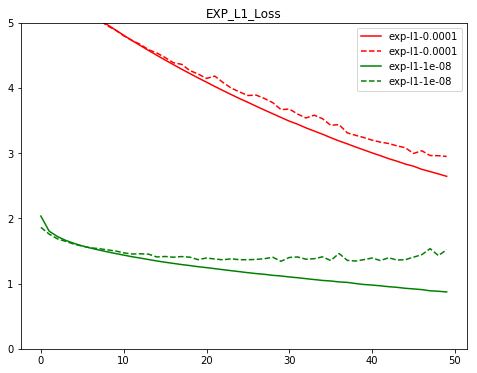

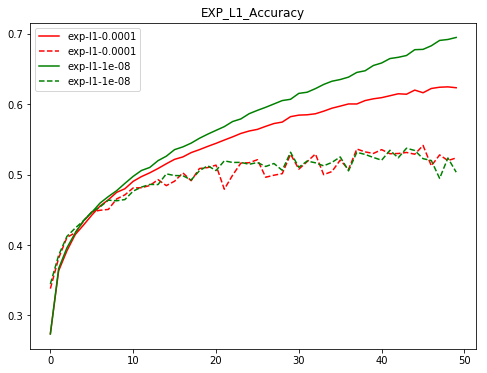

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "y"]

# plt.figure(figsize=(8,6))
# for i, cond in enumerate(L1_results.keys()):
#     plt.plot(range(len(L1_results[cond]['train_loss'])),L1_results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
#     plt.plot(range(len(L1_results[cond]['valid_loss'])),L1_results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
# plt.title("EXP_L1_Loss")
# plt.ylim([0, 5])
# plt.legend()
# plt.show()

# plt.figure(figsize=(8,6))
# for i, cond in enumerate(L1_results.keys()):
#     plt.plot(range(len(L1_results[cond]['train_acc'])),L1_results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
#     plt.plot(range(len(L1_results[cond]['valid_acc'])),L1_results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
# plt.title("EXP_L1_Accuracy")
# plt.legend()
# plt.show()

# plt.figure(figsize=(8,6))
# for i, cond in enumerate(L2_results.keys()):
#     plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
#     plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
# plt.title("EXP_L2_Loss")
# plt.ylim([0, 5])
# plt.legend()
# plt.show()

# plt.figure(figsize=(8,6))
# for i, cond in enumerate(L2_results.keys()):
#     plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
#     plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
# plt.title("EXP_L2_Accuracy")
# plt.legend()
# plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(L1_L2_results.keys()):
    plt.plot(range(len(L1_L2_results[cond]['train_loss'])),L1_L2_results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(L1_L2_results[cond]['valid_loss'])),L1_L2_results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("EXP_L1_L2_Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(L1_L2_results.keys()):
    plt.plot(range(len(L1_L2_results[cond]['train_acc'])),L1_L2_results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(L1_L2_results[cond]['valid_acc'])),L1_L2_results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("EXP_L1_L2_Accuracy")
plt.legend()
plt.show()


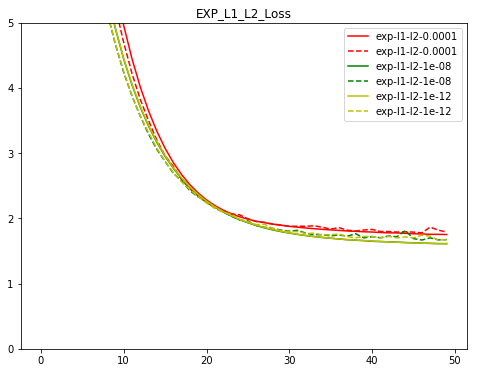

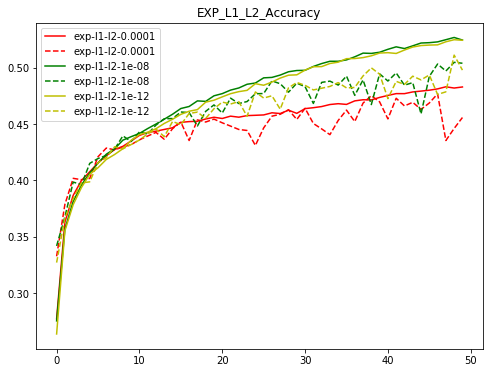

In [21]:
color_bar = ["r", "g", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(L1_L2_results.keys()):
    plt.plot(range(len(L1_L2_results[cond]['train_loss'])),L1_L2_results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(L1_L2_results[cond]['valid_loss'])),L1_L2_results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("EXP_L1_L2_Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(L1_L2_results.keys()):
    plt.plot(range(len(L1_L2_results[cond]['train_acc'])),L1_L2_results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(L1_L2_results[cond]['valid_acc'])),L1_L2_results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("EXP_L1_L2_Accuracy")
plt.legend()
plt.show()
